__Objectives__

- What is training error and test error?

- What is Bias and Variance in ML? 

- What is underfitting and overfitting?

# Polynomial Regression

Recall that we have discussed before about the polynomial regression and see that with them we can capture non-linear relation between X and y.

- In polynomial regression our model will look like:

$$\hat y_i = \hat\beta_0+\hat\beta_1x_i +\hat\beta_2 x^2_i+\hat\beta_3 x^3_i+...+\hat\beta_d x^d_i+\epsilon_i$$ 

- For the loss function we will be still using RSS.

the ith indexer represents columns in the X matrix.
Recall the hats indicate that these are estimators, that these are samples.  

RSS is a function of the coefficients (beta values)

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

import pickle

In [2]:
## Uniformly sample from -2pi and 2pi. We will be working with 25 observations.

x = np.random.uniform(-2*pi, 2*pi, 100)

## We created the target variables y: So we know the true relation between x and y 
## Note also that we added some noise to the y variable.

y = np.sin(x) + np.random.normal(loc = 0, scale = 0.4, size = len(x))

In [3]:
x.shape


(100,)

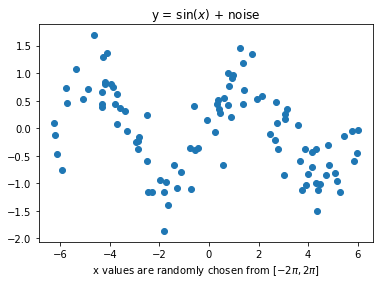

In [4]:
## Let's plot the data
plt.scatter(x,y)

plt.title('y = $\sin(x)$ + noise')

plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')

plt.show()

## Murat recommends as a metric for how good the fit is is looking at the residual plot and seeing if there's a pattern in the residuals plot.

"Any pattern in the residuals means there's still work to do."

C:\Users\shawj\.conda\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


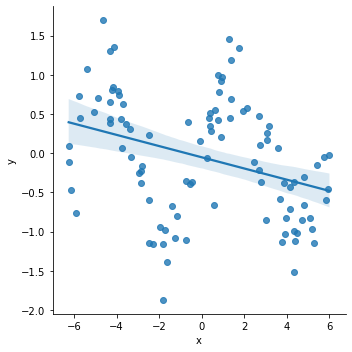

In [5]:
# use seaborn lmplot to visualize regression line 
import pandas as pd

data = pd.DataFrame(data = {'x': x, 'y':y})

import seaborn as sns

sns.lmplot(x = 'x', y= 'y', data = data)

plt.show()

As it is clear from the plot the linear model is insufficient to capture the pattern in the data. This is called __underfitting__. One solution to this problem is to increase the number of variables by adding higher orders of the already existing variables. 

__Your Turn__

- We will use PolynomialFeature class to be able to create new features.

- Create a new dataset with all the powers of x up to 7 degree.

> As things stand now, we have a single column corresponding do our features.  We'll be adding new columns, like x^2, x^3, ....

In [6]:
## Now let's use PolynomialFeature to create higher order features
from sklearn.preprocessing import PolynomialFeatures

In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()

x = scaler.fit_transform(x.reshape(-1,1))

Murat's work for us:  Create a dataset with degree 7 polynomials.

"Fit for train data, fit and transform for test data"

In [8]:
x.shape

(100, 1)

In [10]:
polynomial_features = PolynomialFeatures(degree = 27, interaction_only= False, include_bias= True)
X7=polynomial_features.fit_transform(x.reshape(-1,1))

#Murat suggests using the x7 name

X7[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# %load -r 1-5 supplement.py


In [12]:
## Fit a linear model by either using sklearn.linearmodel or statsmodel.api 

from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression(fit_intercept=False)#fit_intercept is false because we already have a constant column

lr.fit(X7,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [14]:
y_pred=lr.predict(X7)

__Your Turn__

- Use the dataset you created above and fit a linear model to this dataset.

- Make predictions using this data and model.

In [15]:
x.shape

(100, 1)

In [16]:
# %load -r 8-14 supplement.py

__Your Turn__

- Now plot both predictions and true values and analyze the results.

In [17]:
from sklearn.metrics import mean_squared_error

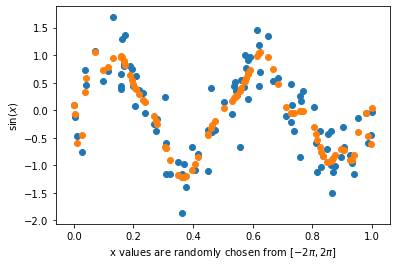

In [18]:
## Let's plot the data
plt.scatter(x,y)
plt.scatter(x, y_pred)

plt.ylabel('$\sin(x)$')

plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')

plt.show()

__Your Turn__

- Try degree=21

After changing to 27 degrees, we're now overfitting.  

__Q:__ It looks like polynomial variables works very well, then why don't we add polynomial features all the time?

# Bias - Variance

In statistical learning and machine learning we start with a model:

$$ Y = f(X) + \epsilon$$

Here $f$ is the function that gives the 'true' relationship between $X$ values and $Y$ values.

- In many situation, from a given a train set $X, y$ we would like to find an estimate $\hat{f}$ of $f$. 

- Notice that the actual $f$ might be very complicated and $\hat{f}$ will be a simplified estimator of $f$ in general.

- We can evaluate the models performance with a metric. In regression setting it is mostly given as MSE:


$$ MSE = \frac{1}{n}\sum\limits_{i=1}^{n}(y_{i} - \hat{f}(x_{i}))^{2}$$

[For more on evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- However, we are really not interested in whether $\hat{f}(x_i) \sim y_i$; instead, we want to know whether $\hat{f}(x_0)$ is approximately equal to $y_{0}$, where $(x_0, y_0)$ is a previously unseen test observation not used to train the statistical learning method.

<img src="img/test_train.png" cap="Transformed dataset"  width='600'/>

- This U-shape we observe on the right between test error and training error is a very common and result of two competing notion: 'Bias' and 'Variance' of the model. More excplicitly we say that the 'average' test error can be decompose into three pieces.

<img src="img/bias_variance.png" cap="Transformed dataset"  width='400'/>

>Flexibility here is, for instance, polynomial degree

__A good model__

- Low error --> Low variance + low bias


__Variance__

- Refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.

__Bias__

- Refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.

The chart below is very common online so I wanted to share here. I think this gives a nice summary but please note that this is absolutely representative.

<img src="https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" width=350, height=350> 


__Q:__ Find a model with a very high bias and very low variance.

__Q:__ Find a model with a very high variance and very low bias.


__Your Turn__

I created a data set and stored this as a pickle. When you load the pickle we will have a list of the form [x,y]. We know that there is a polynomial relationship between x and y. Now the question is to find this relation.


In [19]:
import pickle

with open(r"data_list_xy.pickle", "rb") as input_file:
        data = pickle.load(input_file)

In [21]:
X = data[0]

y = data[1]

Let's use train_test_split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## !!!Don't peak test dataset

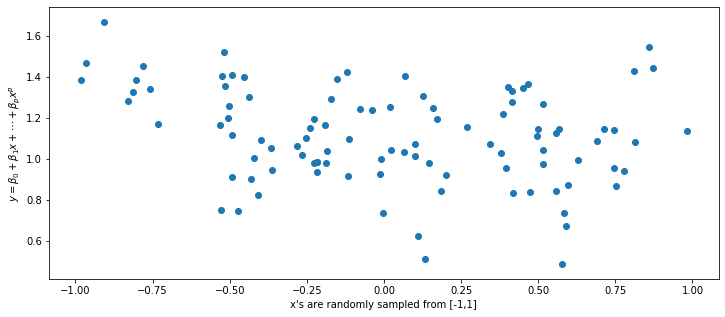

In [23]:
plt.figure(figsize = (12, 5))

plt.scatter(X_train,y_train)

plt.xlabel("x's are randomly sampled from [-1,1]" )

plt.ylabel("$y = \\beta_{0} + \\beta_{1}x + \\cdots + \\beta_{p}x^{p}$")

plt.show()

__Your Turn__

- We know that the true relation between x and y above is a polynomial one. 

- Try to find this relationship



>> Look into pipe.predict, pipe.transform()

In [38]:
fit_dict[1]['train_x'].reshape

array([[ 1.        ,  0.49565905],
       [ 1.        ,  0.69083372],
       [ 1.        , -0.5191581 ],
       [ 1.        , -0.12109153],
       [ 1.        , -0.50369715],
       [ 1.        ,  0.14540156],
       [ 1.        , -0.36649588],
       [ 1.        ,  0.1597202 ],
       [ 1.        ,  0.39424069],
       [ 1.        ,  0.4499549 ],
       [ 1.        ,  0.77851136],
       [ 1.        , -0.96604091],
       [ 1.        , -0.21829143],
       [ 1.        ,  0.3800083 ],
       [ 1.        ,  0.7535096 ],
       [ 1.        ,  0.81522355],
       [ 1.        ,  0.55756127],
       [ 1.        , -0.21863592],
       [ 1.        , -0.47313792],
       [ 1.        , -0.9088197 ],
       [ 1.        ,  0.41648811],
       [ 1.        ,  0.09900983],
       [ 1.        , -0.00804047],
       [ 1.        , -0.75683678],
       [ 1.        , -0.49371105],
       [ 1.        , -0.98265922],
       [ 1.        ,  0.02010871],
       [ 1.        , -0.26671681],
       [ 1.        ,

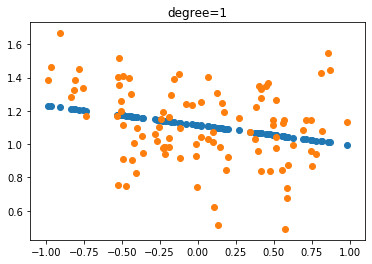

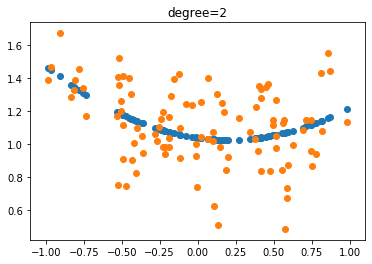

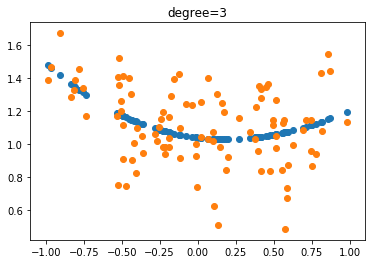

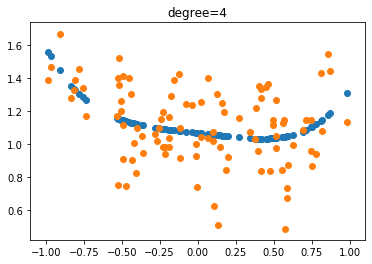

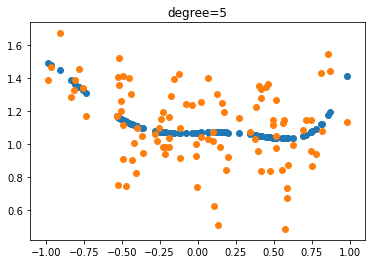

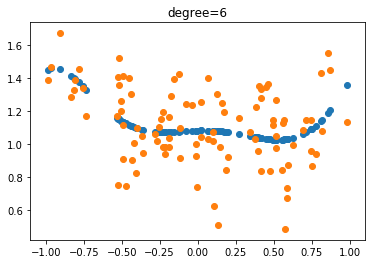

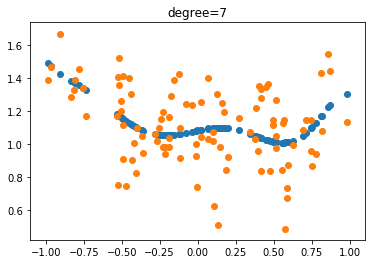

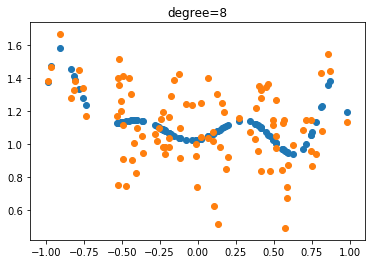

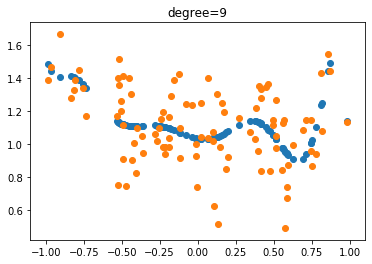

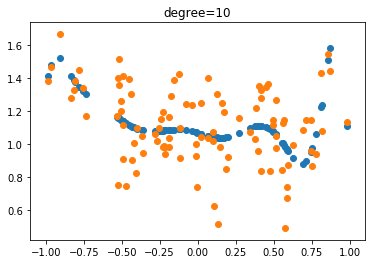

<Figure size 432x288 with 0 Axes>

In [58]:
# %load -r 25-32 supplement.py
#Hint: It's a polynomial.  
fit_dict={}
for n in range(1,11):
    poly_fitter=PolynomialFeatures(degree=n,include_bias=True)
    poly_x=poly_fitter.fit_transform(X_train.reshape(-1,1))
    lr=LinearRegression(fit_intercept=False)
    lr.fit(poly_x,y_train)
    fit_dict[n]={'model':lr,'degree':n,'train_x':poly_x}
    
    
for entry in fit_dict:

    plt.scatter(fit_dict[entry]['train_x'][:,1],fit_dict[entry]['model'].predict(fit_dict[entry]['train_x']))
    plt.scatter(X_train,y_train)
    plt.title(f'degree={fit_dict[entry]["degree"]}')
    plt.show()
    plt.clf()
    

__Documentation__

[Sklearn-PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


__Fit a linear model__

In [101]:
def find_coefficients(data, y):
    np.set_printoptions(precision=4, suppress=True)

    lr = LinearRegression(fit_intercept=False)
    
    lr.fit(data, y)
    
    print(lr.coef_)
    
    y_pred = lr.predict(data)

    return y_pred

In [102]:
## create the dataset with given degree
new_x = create_dataset(X_train, degree= 25)

## fit a linear regression and print coefficients return predictions
predict = find_coefficients(new_x, y_train)

NameError: name 'create_dataset' is not defined

In [ ]:
## plot predictions and true values
## discuss the results.
def plot_predict(x,y,y_pred):
    plt.scatter(x,y, label = 'true')
    plt.scatter(x, y_pred, label = 'train')
    plt.legend()
    plt.show()
    return

Run the cell below to find out the true parameters

In [ ]:
plot_predict(X_train,y_train, predict)

In [ ]:
# %load -r 35-37 supplement.py